In [3]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load the California housing dataset
housing = fetch_california_housing()

# Create a DataFrame from the dataset
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df["Price"] = housing.target

# Split the data into features and target variable
X = df.drop("Price", axis=1)
y = df["Price"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = {}

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    score = r2_score(y_test, predictions)
    results[name] = score
    print(f"{name} R^2 Score: {score:.4f}")

Linear Regression R^2 Score: 0.5758
Random Forest R^2 Score: 0.8038
Gradient Boosting R^2 Score: 0.7756


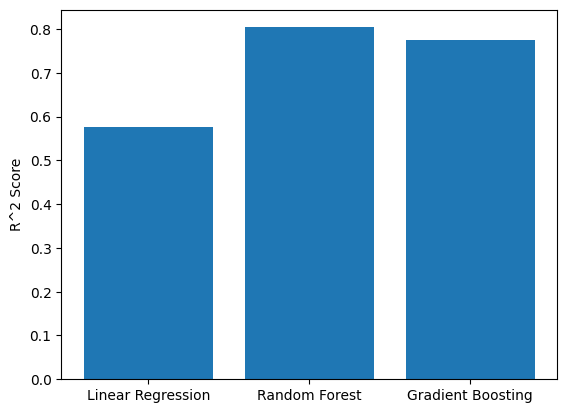

In [4]:
import matplotlib.pyplot as plt

plt.bar(results.keys(), results.values())
plt.ylabel("R^2 Score")
plt.savefig("../images/model_comparison.png")
plt.show()
plt.close()

Conclusion:
Random Forest performed the best with an R^2 score of 0.8038